In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv("../../archive/Mall_Customers.csv")

In [3]:
# Quick look on the dataset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- The mall collects info on the customers who get this card. Spending Score is based on their income, the frequency the visit the mall, and the amount spend in the mall. Closer to 100, the more the client spends.
- You have to segment the customers based on the income and the spending score (lets say if we use more variables)

In [4]:
# Storing the XValues
Xs = df.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']]
Xs_vals = df.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values
Xs.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


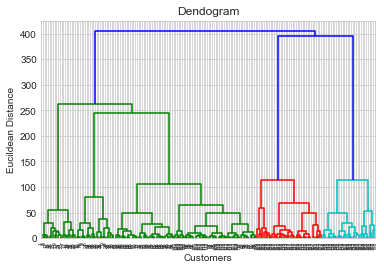

In [6]:
# Using the dendograms to find the optimal numbers of clusters
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(Xs, method='ward')) # minimizes the variance within each cluster

# The ward method looks at the square deviation of each cluster (it must first find a centroid to compare with)
# Merges some clusters (finds the square deviation of that merged cluster)
# Find the difference btw after and before the merge and looks for the smallest one

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Eucildean Distance')
plt.show()

- The largest place to fit the constraint is the blue line to the right, between the green and light blue horiztonal line (there are 5 clusters)

In [7]:
# Fitting the hierarchial clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(Xs)

In [14]:
# Look at the predictions
y_hc[0:10]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3])

In [23]:
from matplotlib import pylab

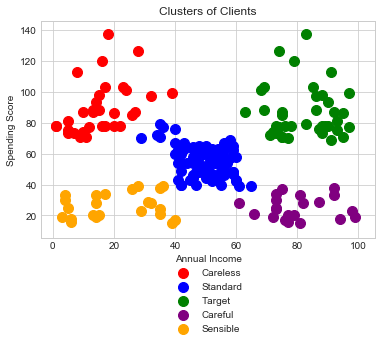

In [32]:
# Visualizing the clusters
plt.scatter(Xs.iloc[y_hc==0, 0], Xs.iloc[y_hc==0, 1], s=100, c='red', label='Careless')
plt.scatter(Xs.iloc[y_hc==1, 0], Xs.iloc[y_hc==1, 1], s=100, c='blue', label='Standard')
plt.scatter(Xs.iloc[y_hc==2, 0], Xs.iloc[y_hc==2, 1], s=100, c='green', label='Target')
plt.scatter(Xs.iloc[y_hc==3, 0], Xs.iloc[y_hc==3, 1], s=100, c='purple', label='Careful')
plt.scatter(Xs.iloc[y_hc==4, 0], Xs.iloc[y_hc==4, 1], s=100, c='orange', label='Sensible')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.show()